In [2]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2024
# License: MIT

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
def make_data(n_samples=50, std=0.2):
    x = np.random.rand(n_samples) * 10
    err = np.random.normal(size=n_samples) * std
    y = np.sin(x) + err
    return x, y

x, y = make_data()

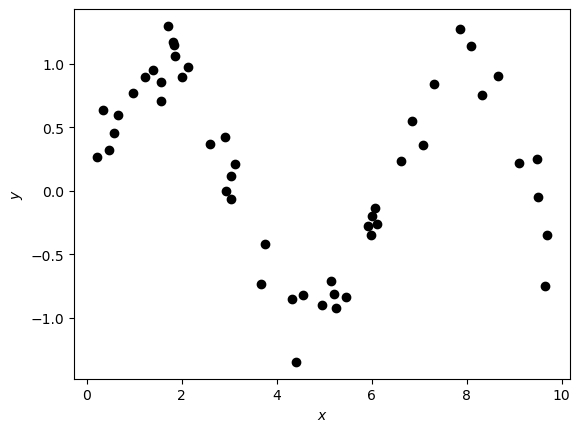

In [5]:
plt.scatter(x, y, color='k')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.savefig('figures/sine_data.pdf')

In [6]:
# Reshape x into a matrix
X = x.reshape(-1, 1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2):
    return Pipeline([('poly', PolynomialFeatures(degree)),
                     ('reg', LinearRegression())])

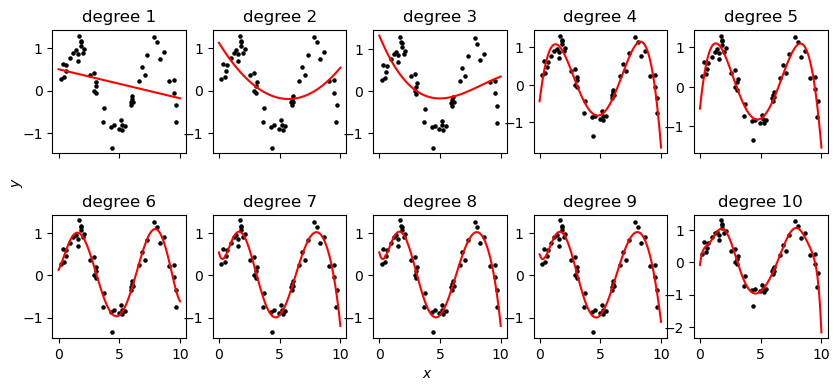

In [8]:
# Create a 2x5 subplot grid
fig, axes = plt.subplots(2, 5, figsize=(10, 4), sharex=True)
plt.subplots_adjust(hspace=0.5)

# Generate evenly spaced values from 0 to 10 for testing the polynomial fits
X_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Iterate over each subplot and polynomial degree from 1 to 10
for ax, degree in zip(axes.flat, range(1, 11)):
    # Plot the original data
    ax.scatter(X, y, color='k', s=5)
    
    # Create and fit a polynomial regression model of the current degree
    model = PolynomialRegression(degree)
    model.fit(X, y)
    
    # Use the fitted model to predict values over the test range
    y_test = model.predict(X_test)    
    
    # Plot the predicted polynomial
    ax.plot(X_test, y_test, color='r')    
    ax.set_title(f'degree {degree}')

# Set common labels for the axes
fig.text(0.5, 0.02, '$x$', ha='center', va='center')
fig.text(0.09, 0.5, '$y$', ha='center', va='center', rotation='vertical')

plt.savefig('figures/polynomial_regression_sine.pdf')

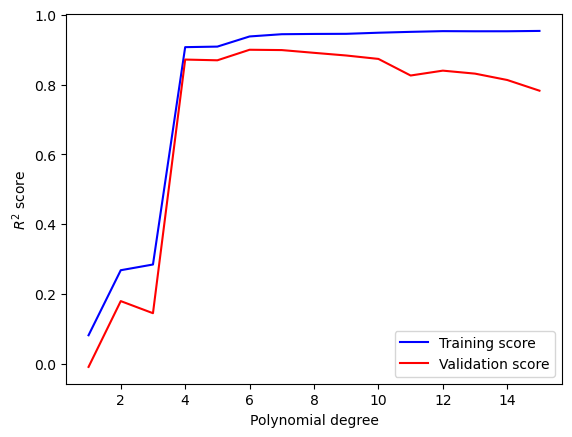

In [10]:
from sklearn.model_selection import validation_curve

degrees = np.arange(1, 16)
train_scores, val_scores = validation_curve(
                                PolynomialRegression(), 
                                X, y, 
                                param_name='poly__degree', 
                                param_range=degrees, 
                                cv=5
                           )
plt.plot(degrees, np.mean(train_scores, axis=1), 'b', label='Training score')
plt.plot(degrees, np.mean(val_scores, axis=1), 'r', label='Validation score')
plt.legend()
plt.xlabel('Polynomial degree')
plt.ylabel('$R^2$ score')

plt.savefig('figures/polynomial_regression_validation_curve.pdf')

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'poly__degree': np.arange(1, 16)}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

print('Optimal polynomial degree:', grid.best_params_['poly__degree'])
print('Best R2 score:', grid.best_score_)

Optimal polynomial degree: 6
Best R2 score: 0.8996347814330881
